KNN using Train-Test Split

In [11]:
#Importing the Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

In [4]:
#Read the dataset 
iris=pd.read_csv('Iris.csv')
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Data Visualization and Analysis

In [5]:
iris.shape

(150, 6)

In [5]:
iris['Species'].value_counts()

In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris.values

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
X=iris.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris.drop('Id', axis=1, inplace=True)

In [12]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y=iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

Data Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=1)
y_test.shape

(50,)

Training and Predicting

In [18]:
knnmodel=KNeighborsClassifier(n_neighbors=3)

In [19]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_predict1=knnmodel.predict(X_test)

Accuracy

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
acc=accuracy_score(y_test,y_predict1)
acc

0.98

Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

In [24]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,17,0,0
versicolor,0,19,0
virginica,0,1,13


Output Visualization

In [25]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [26]:
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [27]:
prediction_output.iloc[0,:].value_counts()

Finding the value of k

In [28]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [29]:
print(mean_acc)

[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.94 0.96 0.94 0.94 0.92 0.92 0.92]


In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.98 with k= 1


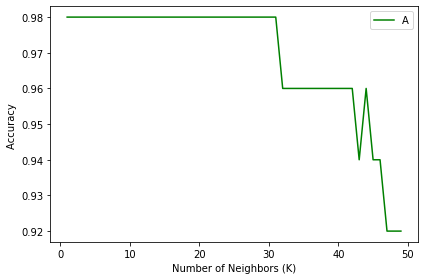

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [32]:
finalknn=KNeighborsClassifier(n_neighbors=3)

In [33]:
finalknn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
earlyStop = EarlyStopping(patience=10)

In [36]:
model = Sequential()

model.add(Dense(4, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [20]:
pickle.dump(encoder, open('ta.pkl', 'wb'))

In [22]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
y_encoder = encoder.transform(y)

In [18]:
from tensorflow.keras.utils import to_categorical

In [40]:
cat_target = to_categorical(y_encoder)

In [41]:
cat_target

In [42]:
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, cat_target, test_size=0.33)

In [43]:
model.fit(x=X_train, y=y_cat_train, epochs=600, validation_data=(X_test, y_cat_test), verbose=1, callbacks=[earlyStop])

Epoch 1/600
4/4 [==============================] - 1s 195ms/step - loss: 3.0180 - val_loss: 2.6988
Epoch 2/600
4/4 [==============================] - 0s 16ms/step - loss: 2.9117 - val_loss: 2.6050
Epoch 3/600
4/4 [==============================] - 0s 18ms/step - loss: 2.8735 - val_loss: 2.5138
Epoch 4/600
4/4 [==============================] - 0s 15ms/step - loss: 2.7415 - val_loss: 2.4264
Epoch 5/600
4/4 [==============================] - 0s 16ms/step - loss: 2.5631 - val_loss: 2.3438
Epoch 6/600
4/4 [==============================] - 0s 15ms/step - loss: 2.6593 - val_loss: 2.2628
Epoch 7/600
4/4 [==============================] - 0s 16ms/step - loss: 2.5620 - val_loss: 2.1859
Epoch 8/600
4/4 [==============================] - 0s 16ms/step - loss: 2.4145 - val_loss: 2.1133
Epoch 9/600
4/4 [==============================] - 0s 15ms/step - loss: 2.3485 - val_loss: 2.0436
Epoch 10/600
4/4 [==============================] - 0s 14ms/step - loss: 2.1537 - val_loss: 1.9767
Epoch 11/600
4/4 [

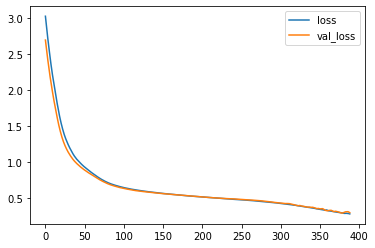

In [44]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [45]:
predictions = model.predict(X_test)

In [46]:
output = predictions.argmax(axis=1)

In [47]:
output

In [48]:
actual=encoder.inverse_transform(output)
actual

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, actual))

                 precision    recall  f1-score   support

    Iris-setosa       0.56      0.59      0.57        17
Iris-versicolor       0.46      0.32      0.37        19
 Iris-virginica       0.32      0.43      0.36        14

       accuracy                           0.44        50
      macro avg       0.44      0.44      0.44        50
   weighted avg       0.45      0.44      0.44        50



In [50]:
model.save('model.h5')

In [87]:
from tensorflow.keras.models import load_model

In [96]:
# Load the model
loaded_model = load_model(
   'model.h5',
    custom_objects=None,
    compile=True
)

In [97]:
model = load_model('model.h5')